# GR5241   HW1

#### NAME: Yuhao Wang          UNI: yw3204

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
%matplotlib inline  

### Problem 1

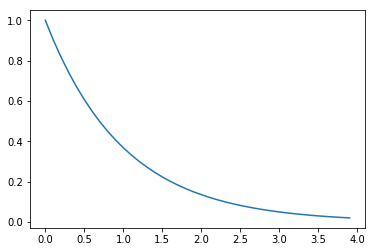

In [2]:
x = np.arange(0.0, 4.0, 0.1)
y = np.exp(-x)

plt.plot(x, y)

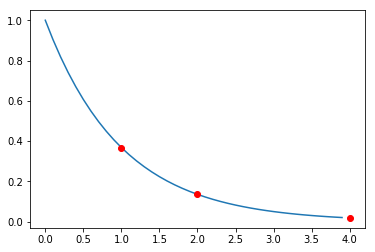

In [3]:
plt.plot(x, y)
plt.plot(1, np.exp(-1), 'ro')
plt.plot(2, np.exp(-2), 'ro')
plt.plot(4, np.exp(-4), 'ro')

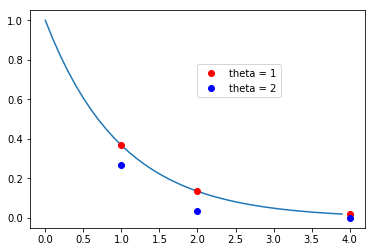

In [4]:
plt.plot(x, y)
plt.plot(1, np.exp(-1), 'ro', label = "theta = 1")
plt.plot(2, np.exp(-2), 'ro')
plt.plot(4, np.exp(-4), 'ro')

plt.plot(1, 2*np.exp(-1*2), 'bo', label = "theta = 2")
plt.plot(2, 2*np.exp(-2*2), 'bo')
plt.plot(4, 2*np.exp(-4*2), 'bo')

plt.legend(loc = (0.5, 0.6))

According to the graph, it is obvious that when $\theta = 2$, the likelihood of each example in the toy data set decreases. And more generally, when $x \ge ln(2)$, $p(x; \theta = 2) \le p(x; \theta = 1)$ always holds.

### Question 1.

Given the $n$ observations and that $q(\theta) = \frac{\beta_0^{\alpha_0}}{\Gamma(\alpha_0)} * \theta^{\alpha_0-1} * e^{-\beta_0\theta}$, we have

$q(\theta|x_1, ..., x_n)$ 

$\propto q(\theta) * \Pi_{i=1}^np(x_i|\theta)$

$= \frac{\beta_0^{\alpha_0}}{\Gamma(\alpha_0)} * \theta^{\alpha_0-1} * e^{-\beta_0\theta} * \theta^n * e^{-\theta*\Sigma_{i=1}^nx_i}$

$\propto \theta^{n+\alpha_0-1} * e^{-\theta(\beta_0+\Sigma_{i=1}^nx_i)}$

Therefore, the posterior corresponds to a Gamma density function with parameter $\alpha = \alpha_0+n$ and $\beta = \beta_0+\Sigma_{i=1}^nx_i$

### Question 2.

#### a.

Based on question 1, we have 
$\alpha_{n-1} = \alpha_0 + n-1$ and $\beta_{n-1} = \beta_0 + \Sigma_{i=1}^{n-1}x_i$.

We then calculate the posterior based on the $n^{th}$ sample and prior $\tilde{q}(\theta) = \Pi(\theta|x_{1:n-1})$, which is proportional to:

$\tilde{q}(\theta) * \theta * e^{-\theta x_n}$

$= \frac{\beta_{n-1}^{\alpha_{n-1}}}{\Gamma(\alpha_{n-1})}*\theta^{\alpha_{n-1}-1}*e^{-\beta_{n-1}\theta} * \theta * e^{-\theta x_n}$

$\propto \theta^{\alpha_{n-1}+1-1} * e^{-\theta(\beta_{n-1}+x_n)}$

Thus, it is a Gamma distribution with parameter $\alpha_{n-1}+1$ and $\beta_{n-1}+x_n$, which are exactly $\alpha_n$ and $\beta_n$. That's to say, $\alpha_n = \alpha_{n-1}+1$ and $\beta_n = \beta_{n-1}+x_n$. Therefore, we can calculate the posterior $\Pi(\theta|x_{1:n})$ as the posterior given the $n^{th}$ observation using the prior $\tilde{q}(\theta)$.

#### b.

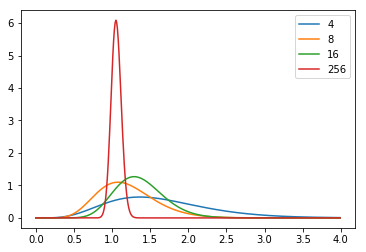

In [7]:
smps = np.random.exponential(1, 256)

a0 = 2
b0 = 0.2
theta = np.arange(0.0, 4.0, 0.01)

for i in [4, 8, 16, 256]:
    at = a0 + i
    bt = b0 + sum(smps[:i])
    plt.plot(theta, gamma.pdf(theta, a=at, scale=1/bt), label = i)
    
plt.legend()

As $n$ increases, the posterior density function tends to center at 1 and becomes more and moer steep.

### Problem 2.

By Bayesian Theorem, the posterior density can be written as:

$f(\pi^1, \pi^2|Y_1^{T_1}, ..., Y_n^{T_n}, T_1, ..., T_n)$

$= \frac{f(\pi^1, \pi^2) * \mathbb{P}(Y_1^{T_1}, ..., Y_n^{T_n}, T_1, ..., T_n|\pi^1, \pi^2)}{\int f(\pi^1, \pi^2) * \mathbb{P}(Y_1^{T_1}, ..., Y_n^{T_n}, T_1, ..., T_n|\pi^1, \pi^2)d\pi_1d\pi_2} $

Because of the independence of $(Y_i
^{T_i}, T_i), i = 1, ..., n$, we have:

$\mathbb{P}(Y_1^{T_1}, ..., Y_n^{T_n}, T_1, ..., T_n|\pi^1, \pi^2)$

$= \Pi_{i=1}^n \mathbb{P}(Y_i^{T_i}, T_i|\pi^1, \pi^2)$

$= \Pi_{i=1}^n \frac{1}{2} * (\pi^{T_i})^{Y_i^{T_i}} * (1-\pi^{T_i})^{1-Y_i^{T_i}}$

Therefore, the posterior density is:

$f(\pi^1, \pi^2|Y_1^{T_1}, ..., Y_n^{T_n}, T_1, ..., T_n)$ 

$= \frac{\Pi_{i=1}^n \frac{1}{2} * (\pi^{T_i})^{Y_i^{T_i}} * (1-\pi^{T_i})^{1-Y_i^{T_i}}}{\int \Pi_{i=1}^n \frac{1}{2} * (\pi^{T_i})^{Y_i^{T_i}} * (1-\pi^{T_i})^{1-Y_i^{T_i}} d\pi^1d\pi^2}$

$= \frac{\Pi_{i=1}^n (\pi^{T_i})^{Y_i^{T_i}} * (1-\pi^{T_i})^{1-Y_i^{T_i}}}{\int \Pi_{i=1}^n (\pi^{T_i})^{Y_i^{T_i}} * (1-\pi^{T_i})^{1-Y_i^{T_i}} d\pi^1d\pi^2}$

### Problem 3.

(a)

Beacuse the expectation of a Poisson($\lambda$) random variable is $\lambda$ and the linearity of expectation, we have:

$\mathbb{E}(\bar{X})$

$= \frac{\Sigma_{i=1}^n X_i}{n}$

$= \frac{\Sigma_{i=1}^n \mathbb{E}(X_i)}{n}$

$= \frac{n\lambda}{n}$

$= \lambda$

(b)

Note that $\mathbb{E}_\lambda(\bar{X} - \lambda)^2 = Var(\bar{X}) = \frac{\lambda}{n}$.

We then try to prove $\mathbb{E}_\lambda(T_n - \lambda)^2 \ge \frac{\lambda}{n}$.

Denote $f(X_1, ..., X_n) = \Pi_{i=1}^n \frac{\lambda^{X_i}}{X_i!}e^{-\lambda}$,

$l(X_1, ..., X_n) = log(f(X_1, ..., X_n)) = (\Sigma_{i=1}^n X_i)log\lambda - \Sigma_{i=1}^n log(X_i!) - n\lambda$ and

$\dot{l}(X_1, ..., X_n) = \frac{\partial}{\partial \lambda} l(X_1, ..., X_n) = \frac{\Sigma_{i=1}^n X_i}{\lambda} - n$.

Then, we have $\mathbb{E}(\dot{l}(X_1, ..., X_n)) = 0$.

We now calculate 

$Cov(\dot{l}(X_1, ..., X_n), T_n)$

$= \mathbb{E}(\dot{l}(X_1, ..., X_n)*T_n)$

$= \Sigma_{\textbf{x}} f(x_1, ..., x_n) * \frac{\partial}{\partial \lambda} l(x_1, ..., x_n) * T_n$

$= \Sigma_{\textbf{x}} f(x_1, ..., x_n) * \frac{1}{f(x_1, ..., x_n)} * \frac{\partial}{\partial \lambda} f(x_1, ..., x_n) * T_n$

$= \Sigma_{\textbf{x}} \frac{\partial}{\partial \lambda} f(x_1, ..., x_n) * T_n$

$= \frac{\partial}{\partial \lambda} \Sigma_{\textbf{x}} f(x_1, ..., x_n) * T_n$

$= \frac{\partial}{\partial \lambda} \mathbb{E}(T_n)$

$= 1$

Also, the variance of $\dot{l}(X_1, ..., X_n)$ is

$Var(\dot{l}(X_1, ..., X_n))$

$= Var(\frac{\Sigma_{i=1}^n X_i}{\lambda} - n)$

$= Var(\frac{\Sigma_{i=1}^n X_i}{\lambda})$

$= \frac{Var(\Sigma_{i=1}^n X_i)}{\lambda^2}$

$= \frac{n}{\lambda}$

Now, according to the Cauchy-Schwarz inequality, we have:

$Cov(\dot{l}(X_1, ..., X_n), T_n)^2 \le Var(\dot{l}(X_1, ..., X_n)) * Var(T_n)$

$<=> 1 \le \frac{n}{\lambda} * \mathbb{E}_\lambda(T_n-\lambda)^2$

which is exacly what we want: $\mathbb{E}_\lambda(T_n-\lambda)^2 \ge \frac{\lambda}{n}$.